Лабораторная работа по машинному обучению.
Работу выполнила: студентка группы 3825М1ФИ2, Шишкина Валерия Алексеевна

Информация о датасете: 

Глобальная база данных по терроризму (GTD) — это база данных с открытым исходным кодом, содержащая информацию о террористических актах по всему миру с 1970 по 2017 год. GTD содержит систематизированные данные о внутренних и международных террористических актах, произошедших за этот период, и на сегодняшний день содержит информацию о более чем 180 000 атак.

Признаки:
1. Идентификаторы и метаданные:
    eventid — уникальный ID события
    related — ID связанных событий
    dbsource — источник в базе
    scite1, scite2, scite3 — источники информации
2. Временные признаки:
   iyear, imonth, iday — год, месяц, день
   approxdate — приблизительная дата
   extended — атака длилась > 24ч
3. Географические признаки:
   country, country_txt — страна
   region, region_txt — регион
   provstate, city — штат/провинция и город
   latitude, longitude - координаты
   specificity — точность локации
   vicinity — в пригороде/за городом
   location — точный адрес
   kidhijcountry — страна угона/захвата (для hijacking/hostage)
4. Критерии терроризма и достоверность:
    crit1, crit2, crit3 — формальные критерии терроризма
    doubtterr — сомнения, что это терроризм
    alternative, alternative_txt — альтернативная интерпретация
    multiple — часть серии атак
5. Характеристики атаки:
    success — успешна ли атака
    suicide — самоубийственная атака
    attacktype1/2/3, attacktype1/2/3_txt — тип(ы) атаки
    attacktype_combined, attacktype_combined_txt — комбинированный тип
6. Цели:
    targtype1/2/3, targtype1/2/3_txt — тип цели
    targsubtype1/2/3, targsubtype1/2/3_txt — подтип цели
    corp1/2/3 — организация-цель
    target1/2/3 — конкретная цель
    natlty1/2/3, natlty1/2/3_txt — национальность цели
7. Исполнители:
    gname, gname2, gname3 — названия групп
    gsubname, gsubname2, gsubname3 — подгруппы
    individual — одиночка
    nperps — число нападавших
    nperpcap — число пойманных
    guncertain1/2/3 — неуверенность в исполнителе
8. Заявления об ответственности:
    claimed — заявила ли группа
    claimmode, claimmode2, claimmode3 — способ заявления
    claimmode_txt и т.д. — текстовые описания способа
    compclaim — конкурирующие заявления
9. Оружие:
    weaptype1/2/3/4, weaptype1/2/3/4_txt — тип оружия
    weapsubtype1/2/3/4, weapsubtype1/2/3/4_txt — подтип оружия
    weapdetail — детали оружия
10. Жертвы и ущерб:
    nkill, nkillus, nkillter — убитые (всего, США, террористы)
    nwound, nwoundus, nwoundter — раненые
    property — нанесён ли ущерб имуществу
    propextent, propextent_txt — масштаб ущерба
    propvalue — стоимость ущерба
    propcomment — комментарий к ущербу
11. Захват заложников, угоны:
    ishostkid — был ли захват
    nhostkid, nhostkidus — число заложников
    nhours, ndays — длительность захвата
    divert — перенаправление транспорта
    ransom — требовался выкуп
    ransomamt, ransomamtus — сумма выкупа
    ransompaid, ransompaidus — выкуп заплачен
    ransomnote — записка с требованиями
    hostkidoutcome, hostkidoutcome_txt — исход захвата
    nreleased — освобождено заложников
12. Международный аспект:
    INT_LOG — международная логистика
    INT_IDEO — международная идеология
    INT_MISC — прочая международная связь
    INT_ANY — любая международная связь
13. Текстовые и дополнительные поля:
    summary — краткое описание события
    motive — мотив (если известен)
    addnotes — дополнительные заметки
    
Задача: многоклассовая классификация типа террористической атаки.
Разработать модель машинного обучения, способную предсказывать тип террористической атаки (attacktype1) на основе доступных признаков события — таких как географическое местоположение, цель, используемое оружие, год, месяц, принадлежность к группе и других характеристик.

I. Чтение данных

In [282]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel('globalterrorismdb_0718dist.xlsx')
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN


В начале поработаем с выводом данных различными способами.

In [283]:
df

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181685,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0.0,0.0,0.0,0.0,NaN
181686,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
181687,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
181688,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9.0,-9.0,0.0,-9.0,NaN


In [284]:
print(df)

             eventid  iyear  imonth  iday approxdate  extended resolution  \
0       197000000001   1970       7     2        NaN         0        NaN   
1       197000000002   1970       0     0        NaN         0        NaN   
2       197001000001   1970       1     0        NaN         0        NaN   
3       197001000002   1970       1     0        NaN         0        NaN   
4       197001000003   1970       1     0        NaN         0        NaN   
...              ...    ...     ...   ...        ...       ...        ...   
181685  201712310022   2017      12    31        NaN         0        NaN   
181686  201712310029   2017      12    31        NaN         0        NaN   
181687  201712310030   2017      12    31        NaN         0        NaN   
181688  201712310031   2017      12    31        NaN         0        NaN   
181689  201712310032   2017      12    31        NaN         0        NaN   

        country         country_txt  region  ... addnotes  \
0            5

In [285]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN


Метод df.head() выводит информацию о первых пяти строках таблицы.

In [286]:
df.tail()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
181685,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0.0,0.0,0.0,0.0,NaN
181686,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
181687,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
181688,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9.0,-9.0,0.0,-9.0,NaN
181689,201712310032,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Security tightened in Cotabato following IED ...","""Security tightened in Cotabato City,"" Manila ...",NaN,START Primary Collection,-9.0,-9.0,0.0,-9.0,NaN


Метод df.tail() выводит информацию о последних пяти строках таблицы.

Теперь посмотрим на размеры таблицы:количество строк (каждая строка - отдельное террористическое событие), количечество столбцов (каждый столбец - конкретный признак).

In [287]:
print(df.shape)

(181690, 135)


Видим, что количество событий - 181691, количество признаков - 135.

In [288]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181690 entries, 0 to 181689
Columns: 135 entries, eventid to related
dtypes: float64(65), int64(8), object(62)
memory usage: 187.1+ MB


In [289]:
print(df.columns)

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)


Метод print(df.columns) используется для вывода названий столбцов. В процессе решения задачи, может понадобиться переименовать столбцы таблицы, это можно сделать с помощью метода df.rename(columns=...).

In [290]:
df.index

RangeIndex(start=0, stop=181690, step=1)

В процессе решения задачи может потребоваться обратить к какому-то одному или нескольким отдельным столбцам, к отдельному элементу, получить тип элеменета или признака, и т.д. Это можно сделать следующим образом:

In [291]:
df.at[3, 'attacktype1']

3.0

In [292]:
df['attacktype1']

0         1.0
1         6.0
2         1.0
3         3.0
4         7.0
         ... 
181685    2.0
181686    NaN
181687    NaN
181688    3.0
181689    3.0
Name: attacktype1, Length: 181690, dtype: float64

In [293]:
df['attacktype1'][2]

1.0

In [294]:
df['attacktype1'].dtype.name

'float64'

In [295]:
type(df['attacktype1'][3])

numpy.float64

In [296]:
type(df['attacktype1'])

pandas.core.series.Series

In [297]:
df[['success', 'attacktype1']].head()

,success,attacktype1
0,1.0,1.0
1,1.0,6.0
2,1.0,1.0
3,1.0,3.0
4,1.0,7.0


На основании выведенных данных можно увидеть, что атаки разных типов были успешно реализованы.

In [298]:
df.describe()

,eventid,iyear,imonth,iday,extended,country,region,specificity,vicinity,crit1,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816900e+05,181690.000000,181690.000000,181690.000000,181690.000000,181690.000000,181690.000000,181684.000000,181690.000000,151574.000000,...,1.041000e+03,3.000000e+02,4.970000e+02,292.000000,6685.000000,6161.000000,138331.000000,138331.000000,138331.000000,138331.000000
mean,2.002705e+11,2002.638956,6.467263,15.505614,0.045346,131.968705,7.160922,1.451454,0.068298,0.987636,...,3.095045e+06,7.145944e+05,5.285444e+05,421.863014,4.520120,-26.340205,-5.065820,-5.015058,0.094599,-4.414874
std,1.325960e+09,13.259456,3.388308,8.814060,0.208063,112.414811,2.933408,0.995432,0.284554,0.110503,...,3.311326e+07,7.787929e+06,2.885991e+06,3995.546426,2.045727,58.016373,4.505124,4.576234,0.620956,4.705112
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,1.000000,-9.000000,0.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,1.000000,0.000000,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,1.000000,0.000000,1.000000,...,1.200000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,-9.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,1.000000,0.000000,1.000000,...,4.515000e+05,0.000000e+00,2.000000e+04,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,5.000000,1.000000,1.000000,...,1.000000e+09,1.320000e+08,4.100000e+07,48000.000000,7.000000,1201.000000,1.000000,1.000000,1.000000,1.000000


II. Разведоченный анализ данных.

In [299]:
df_small = df[['iyear', 'country_txt', 'region_txt', 'attacktype1_txt', 'nkill', 'nwound']]

In [300]:
df_small

,iyear,country_txt,region_txt,attacktype1_txt,nkill,nwound
0,1970,Dominican Republic,Central America & Caribbean,Assassination,1.0,0.0
1,1970,Mexico,North America,Hostage Taking (Kidnapping),0.0,0.0
2,1970,Philippines,Southeast Asia,Assassination,1.0,0.0
3,1970,Greece,Western Europe,Bombing/Explosion,NaN,NaN
4,1970,Japan,East Asia,Facility/Infrastructure Attack,NaN,NaN
...,...,...,...,...,...,...
181685,2017,Somalia,Sub-Saharan Africa,Armed Assault,1.0,2.0
181686,2017,Syria,Middle East & North Africa,NaN,NaN,NaN
181687,2017,Philippines,Southeast Asia,NaN,NaN,NaN
181688,2017,India,South Asia,Bombing/Explosion,0.0,0.0


Удалем строки, в которых не указан типа атаки.

In [301]:
df_small = df_small.dropna(subset=['attacktype1_txt'])

Посчитаем, сколько раз встречается каждый тип атаки с помощью df_small.dropna().

In [302]:
attack_counts = df_small['attacktype1_txt'].value_counts()
attack_counts

attacktype1_txt
Bombing/Explosion                      75717
Armed Assault                          35003
Assassination                          17858
Facility/Infrastructure Attack          8273
Hostage Taking (Kidnapping)             7718
Unknown                                 4821
Hostage Taking (Barricade Incident)      833
Unarmed Assault                          818
Hijacking                                533
Name: count, dtype: int64

In [303]:
top5_attacks = attack_counts.head(5)
top5_attacks

attacktype1_txt
Bombing/Explosion                 75717
Armed Assault                     35003
Assassination                     17858
Facility/Infrastructure Attack     8273
Hostage Taking (Kidnapping)        7718
Name: count, dtype: int64

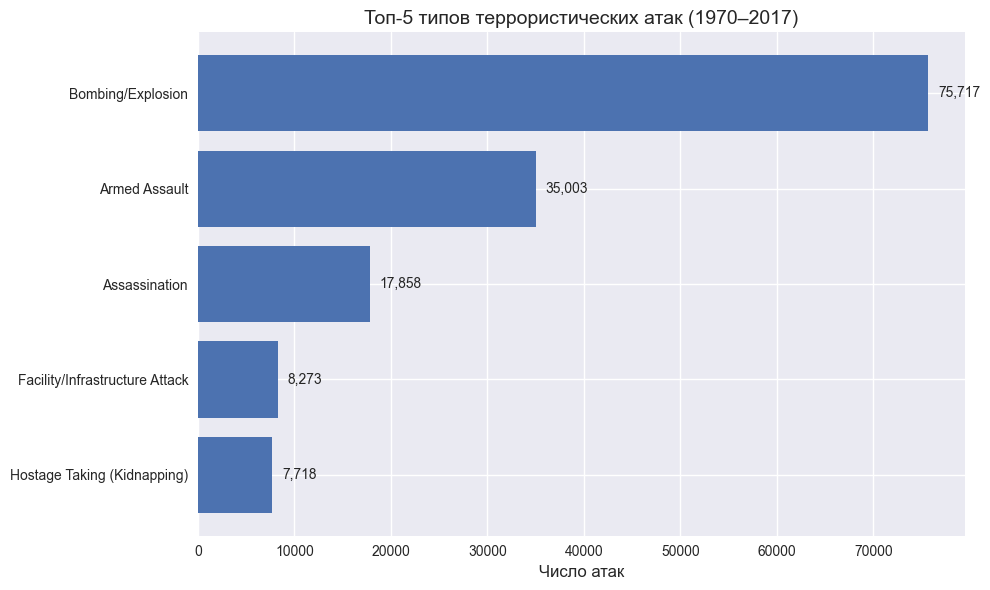

In [304]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8')
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.barh(top5_attacks.index, top5_attacks.values)
ax.set_xlabel('Число атак', fontsize=12)
ax.set_title('Топ-5 типов террористических атак (1970–2017)', fontsize=14)
ax.invert_yaxis()
for bar in bars:
    width = bar.get_width()
    ax.text(width + 1000, bar.get_y() + bar.get_height()/2,
            f'{int(width):,}', va='center', fontsize=10)

plt.tight_layout()
plt.show()

Наиболее распространённым типом террористической атаки за период 1970–2017 гг. является взрыв/бомбардировка (Bombing/Explosion) — их было 88 255, что почти в 2 раза больше, чем следующий по частоте тип.
Проанализируем динамику терроризма по годам.

In [305]:
attacks_per_year = df['iyear'].value_counts().sort_index()

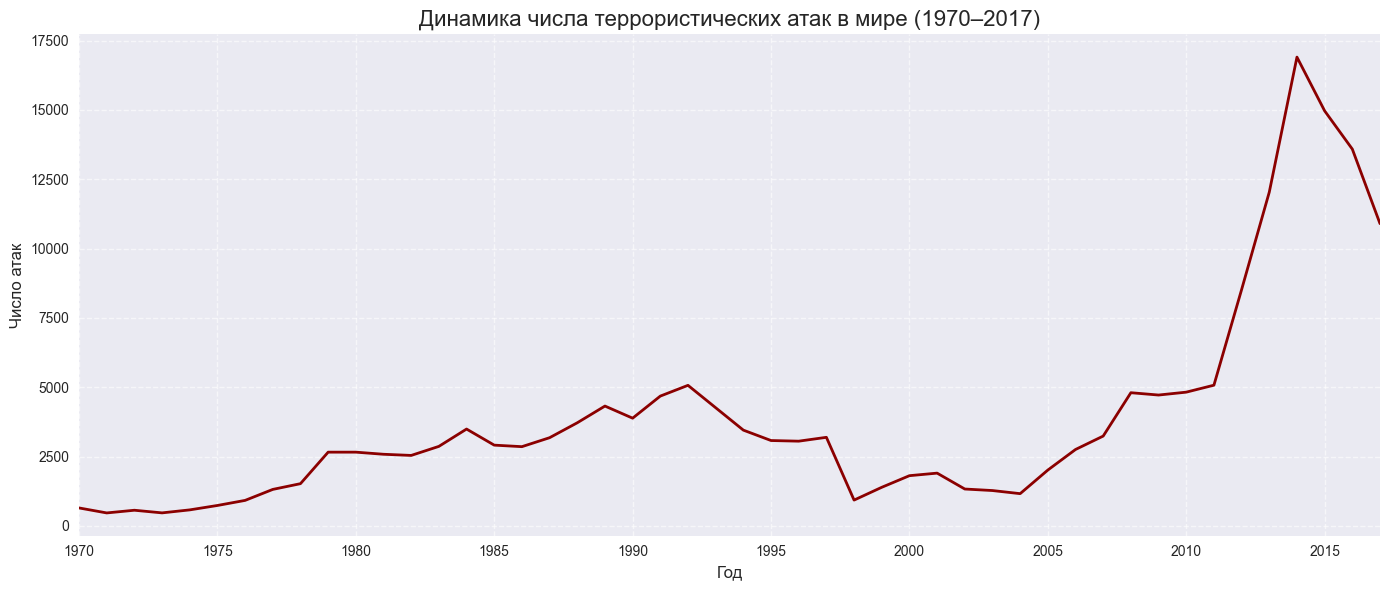

In [306]:
import numpy as np
plt.figure(figsize=(14, 6))
plt.plot(attacks_per_year.index, attacks_per_year.values, color='darkred', linewidth=2)
plt.title('Динамика числа террористических атак в мире (1970–2017)', fontsize=16)
plt.xlabel('Год', fontsize=12)
plt.ylabel('Число атак', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xlim(1970, 2017)
plt.xticks(np.arange(1970, 2018, 5))
plt.tight_layout()
plt.show()

Пять самых террористических лет.

In [307]:
top_years = attacks_per_year.nlargest(5)
print("Годы с наибольшим числом атак:")
top_years

Годы с наибольшим числом атак:


iyear
2014    16903
2015    14965
2016    13587
2013    12036
2017    10900
Name: count, dtype: int64

Теперь построим гистрограмму распределения числа жертв.

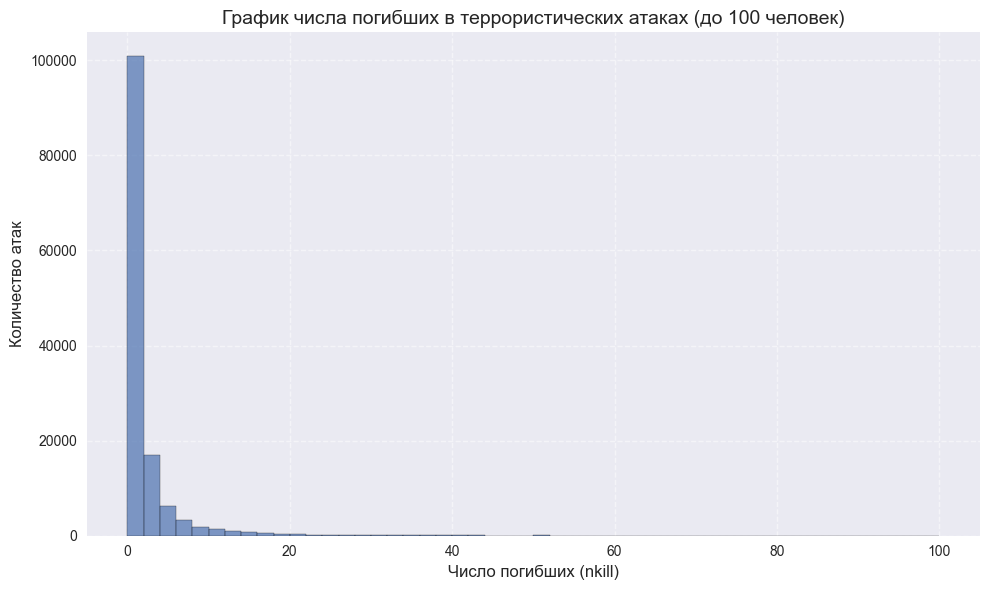

In [308]:
nkill_clean = df['nkill'].dropna()

nkill_limited = nkill_clean[nkill_clean <= 100]

plt.figure(figsize=(10, 6))
plt.hist(nkill_limited, bins=50, edgecolor='black', alpha=0.7)

plt.title('График числа погибших в террористических атаках (до 100 человек)', fontsize=14)
plt.xlabel('Число погибших (nkill)', fontsize=12)
plt.ylabel('Количество атак', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [309]:
df[['nkill', 'nwound']].describe()

,nkill,nwound
count,135541.000000,131359.000000
mean,2.185781,3.139861
std,10.723777,39.452153
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,2.000000,2.000000
max,1570.000000,8191.000000


Признак nkill (количество погибших в результате атаки):
Данные о числе погибших доступны в 171 378 записях из общего числа 181 690 атак.
Среднее значение составляет 2,4 человека на одну атаку.
Медиана равна 0 - это означает, что в половине всех атак никто не погиб.
Более того, в 75 % атак число погибших не превышает 2 человек.
При этом максимальное значение — 1 570 погибших, что указывает на наличие единичных, но чрезвычайно разрушительных инцидентов.
Высокое стандартное отклонение (11,54) подтверждает сильный разброс данных и наличие редких, но экстремальных значений.

Признак nwound (количество раненых в результате атаки):
Данные о раненых присутствуют в 165 380 записях из общего числа 181 690 атак.
Среднее число раненых — около 3,17 на атаку.
Медиана также равна 0 - это означает, что в половине атак никто не пострадал физически.
75 % атак привели к двум или менее раненым.
Однако максимальное значение — 8 191 раненый, что свидетельствует о наличии масштабных терактов в людных местах.
Стандартное отклонение очень велико - около 35,95, что подтверждает сильный разброс данных.

Поскольку датасет очень большой и имеет достаточно много признаков, то его необходимо обработать. Логично предположить, что для классификации типов атак необходимо в большей степени обращать внимание на признаки, связанные с тем, где она произошла, в какое время, какова была ее цель, тип оружия.

In [312]:
features_to_use = [
    'iyear', 'imonth', 'iday',
    'country', 'region',
    'latitude', 'longitude',
    'targtype1', 'targsubtype1', 'natlty1',
    'weaptype1', 'weapsubtype1',
    'extended', 'multiple', 'success',
    'suicide', 'ishostkid', 'nkill', 'attacktype1']

In [313]:
X = df[features_to_use].copy()

In [314]:
X

,iyear,imonth,iday,country,region,latitude,longitude,targtype1,targsubtype1,natlty1,weaptype1,weapsubtype1,extended,multiple,success,suicide,ishostkid,nkill,attacktype1
0,1970,7,2,58,2,18.456792,-69.951164,14.0,68.0,58.0,13.0,NaN,0,0.0,1.0,0.0,0.0,1.0,1.0
1,1970,0,0,130,1,19.371887,-99.086624,7.0,45.0,21.0,13.0,NaN,0,0.0,1.0,0.0,1.0,0.0,6.0
2,1970,1,0,160,5,15.478598,120.599741,10.0,54.0,217.0,13.0,NaN,0,0.0,1.0,0.0,0.0,1.0,1.0
3,1970,1,0,78,8,37.99749,23.762728,7.0,46.0,217.0,6.0,16.0,0,0.0,1.0,0.0,0.0,NaN,3.0
4,1970,1,0,101,4,33.580412,130.396361,7.0,46.0,217.0,8.0,NaN,0,0.0,1.0,0.0,0.0,NaN,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181685,2017,12,31,182,11,2.359673,45.385034,4.0,36.0,182.0,5.0,5.0,0,0.0,1.0,0.0,0.0,1.0,2.0
181686,2017,12,31,200,10,35.407278,35.942679,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
181687,2017,12,31,160,5,6.900742,124.437908,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
181688,2017,12,31,92,6,24.798346,93.94043,2.0,21.0,92.0,6.0,7.0,0,0.0,0.0,0.0,0.0,0.0,3.0


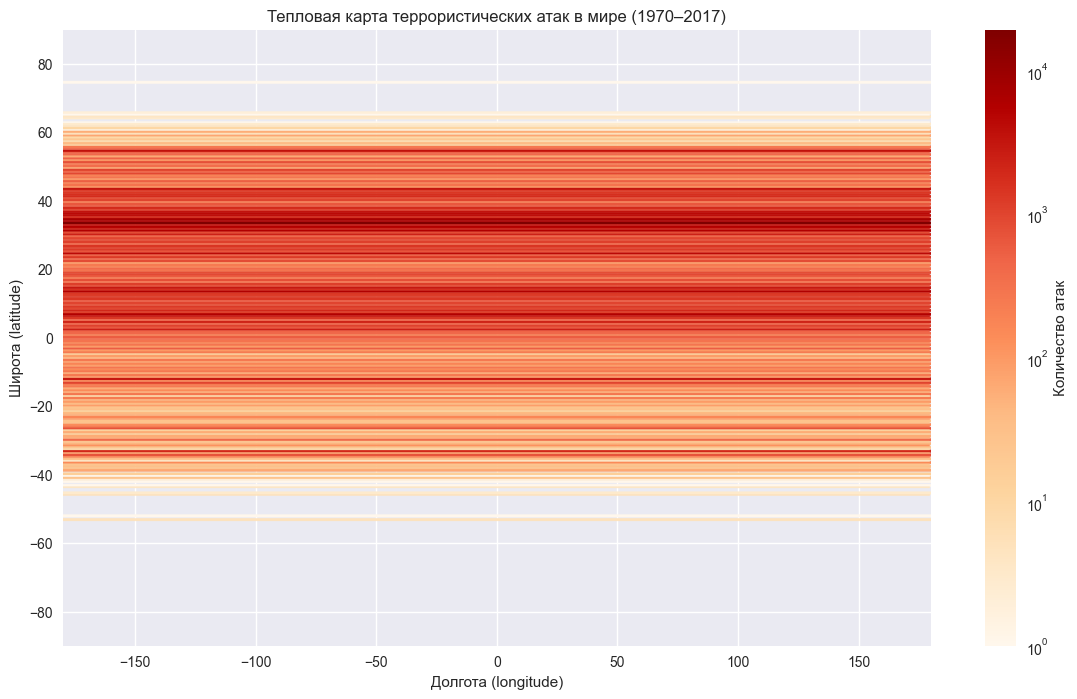

In [318]:
df['longitude'] = pd.to_numeric(df['longitude'], errors='coerce')
df['latitude'] = pd.to_numeric(df['latitude'], errors='coerce')

df_geo = df.dropna(subset=['latitude', 'longitude'])

plt.figure(figsize=(14, 8))
plt.hexbin(
    df_geo['longitude'],
    df_geo['latitude'],
    gridsize=200, 
    cmap='OrRd',
    mincnt=1,
    bins='log')
plt.colorbar(label='Количество атак')
plt.xlabel('Долгота (longitude)')
plt.ylabel('Широта (latitude)')
plt.title('Тепловая карта террористических атак в мире (1970–2017)')
plt.xlim(-180, 180)
plt.ylim(-90, 90)
plt.show()

Террористические атаки распределены неравномерно, они концентрируются в широте от 30 до 40.

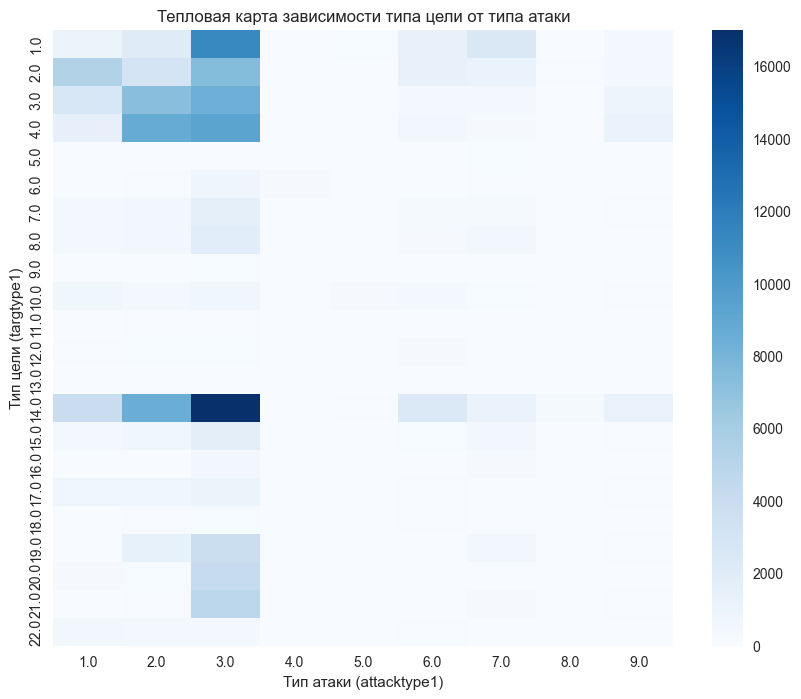

In [319]:
import seaborn as sns
ct = pd.crosstab(df['targtype1'], df['attacktype1'])
plt.figure(figsize=(10, 8))
sns.heatmap(ct, annot=False, cmap='Blues', cbar=True)
plt.title('Тепловая карта зависимости типа цели от типа атаки')
plt.xlabel('Тип атаки (attacktype1)')
plt.ylabel('Тип цели (targtype1)')
plt.show()

Самый темные прямоугольничек на пересечении типа атаки 3 (Bombing/Explosion) и типа цели 14 (Private Citizens & Property). Также достаточно яркими являются прямоугольники, которые находятся на пересечении типа атаки 3 (Bombing/Explosion) с типами цели 1 (Business), 2 (Government (General)), 3 (Police), 4 (Military), 19 (Transportation), 21 (Utilities). Если рассматривать тип атаки 2 (Armed Assault), можно увидеть, что сильная зависимость с типом цели 3 (Police), 4 (Military) и 14 (Private Citizens & Property). Между другими типами атак и типами целей также имеют зависимости, но они уже не такие сильные. 

In [320]:
 if 'attacktype1_txt' in df.columns:
    attack_map = df[['attacktype1', 'attacktype1_txt']].drop_duplicates().sort_values('attacktype1')
    print(attack_map)

     attacktype1                      attacktype1_txt
0            1.0                        Assassination
5            2.0                        Armed Assault
3            3.0                    Bombing/Explosion
12           4.0                            Hijacking
336          5.0  Hostage Taking (Barricade Incident)
1            6.0          Hostage Taking (Kidnapping)
4            7.0       Facility/Infrastructure Attack
298          8.0                      Unarmed Assault
16           9.0                              Unknown
55           NaN                                  NaN


In [321]:
if 'targtype1_txt' in df.columns:
    targ_map = df[['targtype1', 'targtype1_txt']].drop_duplicates().sort_values('targtype1')
    print(targ_map)

      targtype1                   targtype1_txt
14          1.0                        Business
9           2.0            Government (General)
5           3.0                          Police
8           4.0                        Military
4545        5.0                Abortion Related
12          6.0             Airports & Aircraft
1           7.0         Government (Diplomatic)
17          8.0         Educational Institution
232         9.0            Food or Water Supply
2          10.0             Journalists & Media
907        11.0                        Maritime
179        12.0                             NGO
354        13.0                           Other
0          14.0     Private Citizens & Property
35         15.0  Religious Figures/Institutions
219        16.0               Telecommunication
298        17.0    Terrorists/Non-State Militia
95         18.0                        Tourists
47         19.0                  Transportation
36         20.0                         

In [322]:
missing_values = [
    'latitude', 'longitude',
    'targtype1', 'targsubtype1',
    'natlty1', 'weaptype1',
    'weapsubtype1', 'multiple',
    'success', 'suicide',
    'ishostkid', 'attacktype1']

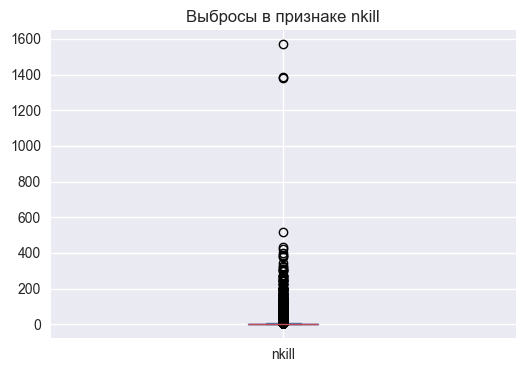

In [323]:
df['nkill'].plot(kind='box', figsize=(6, 4))
plt.title('Выбросы в признаке nkill')
plt.show()

Основная масса данных сосредоточена в диапазоне от 0 до 500, остальные значения уже считаются выбросами.

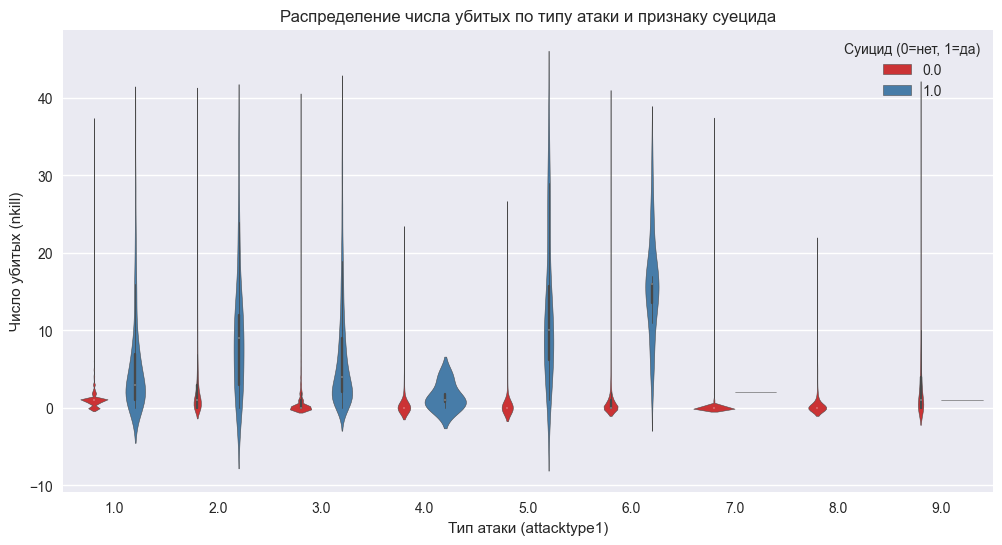

In [324]:
df_clean = df.dropna(subset=['attacktype1', 'nkill', 'suicide'])
df_clean = df_clean[df_clean['nkill'] >= 0]
df_clean = df_clean[df_clean['nkill'] <= 40]

plt.figure(figsize=(12, 6))
sns.violinplot(
    x="attacktype1",
    y="nkill",
    hue="suicide",
    data=df_clean,
    palette="Set1",
    split=False
)

plt.ylabel('Число убитых (nkill)')
plt.xlabel('Тип атаки (attacktype1)')
plt.title('Распределение числа убитых по типу атаки и признаку суецида')
plt.legend(title='Суицид (0=нет, 1=да)')
plt.show()

III. Обработка пропущенных значений.

In [325]:
X.isnull().sum()

iyear               0
imonth              0
iday                0
country             0
region              0
latitude         4556
longitude        4557
targtype1       30116
targsubtype1    39130
natlty1         31561
weaptype1       35234
weapsubtype1    51382
extended            0
multiple        30116
success         30116
suicide         30116
ishostkid       38707
nkill           46149
attacktype1     30116
dtype: int64

In [326]:
X['latitude'] = pd.to_numeric(X['latitude'], errors='coerce')
X['longitude'] = pd.to_numeric(X['longitude'], errors='coerce')

X['latitude'] = X['latitude'].fillna(X['latitude'].median())
X['longitude'] = X['longitude'].fillna(X['longitude'].median())

In [327]:
X.isnull().sum()

iyear               0
imonth              0
iday                0
country             0
region              0
latitude            0
longitude           0
targtype1       30116
targsubtype1    39130
natlty1         31561
weaptype1       35234
weapsubtype1    51382
extended            0
multiple        30116
success         30116
suicide         30116
ishostkid       38707
nkill           46149
attacktype1     30116
dtype: int64

In [329]:
X['targsubtype1'] = X['targsubtype1'].fillna(-1)
X['natlty1'] = X['natlty1'].fillna(-1)
X['weaptype1'] = X['weaptype1'].fillna(-1)
X['weapsubtype1'] = X['weapsubtype1'].fillna(-1)

X['ishostkid'] = X['ishostkid'].fillna(df['ishostkid'].mode()[0])

In [330]:
X.isnull().sum()

iyear               0
imonth              0
iday                0
country             0
region              0
latitude            0
longitude           0
targtype1       30116
targsubtype1        0
natlty1             0
weaptype1           0
weapsubtype1        0
extended            0
multiple        30116
success         30116
suicide         30116
ishostkid           0
nkill           46149
attacktype1     30116
dtype: int64

In [331]:
X = X.dropna(subset=['attacktype1'])

In [332]:
X.isnull().sum()

iyear               0
imonth              0
iday                0
country             0
region              0
latitude            0
longitude           0
targtype1           0
targsubtype1        0
natlty1             0
weaptype1           0
weapsubtype1        0
extended            0
multiple            0
success             0
suicide             0
ishostkid           0
nkill           16033
attacktype1         0
dtype: int64

In [333]:
X['nkill'] = X['nkill'].fillna(df['nkill'].mode()[0])

C:\Users\ЛЕРА\AppData\Local\Temp\ipykernel_14908\2019621875.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['nkill'] = X['nkill'].fillna(df['nkill'].mode()[0])


In [334]:
X.isnull().sum()

iyear           0
imonth          0
iday            0
country         0
region          0
latitude        0
longitude       0
targtype1       0
targsubtype1    0
natlty1         0
weaptype1       0
weapsubtype1    0
extended        0
multiple        0
success         0
suicide         0
ishostkid       0
nkill           0
attacktype1     0
dtype: int64

Все пропущенные значения обработаны. При обработке пропущенных значений использовались три стратегии: заполнение медианой для непрерывных числовых признаков (latitude, longitude), замена на специальное значение -1 и заполнение модой для бинарного признака (ishostkid).

IV. Обучение

In [335]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

In [336]:
X[features_to_use]

,iyear,imonth,iday,country,region,latitude,longitude,targtype1,targsubtype1,natlty1,weaptype1,weapsubtype1,extended,multiple,success,suicide,ishostkid,nkill,attacktype1
0,1970,7,2,58,2,18.456792,-69.951164,14.0,68.0,58.0,13.0,-1.0,0,0.0,1.0,0.0,0.0,1.0,1.0
1,1970,0,0,130,1,19.371887,-99.086624,7.0,45.0,21.0,13.0,-1.0,0,0.0,1.0,0.0,1.0,0.0,6.0
2,1970,1,0,160,5,15.478598,120.599741,10.0,54.0,217.0,13.0,-1.0,0,0.0,1.0,0.0,0.0,1.0,1.0
3,1970,1,0,78,8,37.997490,23.762728,7.0,46.0,217.0,6.0,16.0,0,0.0,1.0,0.0,0.0,0.0,3.0
4,1970,1,0,101,4,33.580412,130.396361,7.0,46.0,217.0,8.0,-1.0,0,0.0,1.0,0.0,0.0,0.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181681,2017,12,31,98,8,42.888982,13.772795,14.0,65.0,98.0,-1.0,-1.0,0,0.0,1.0,0.0,0.0,0.0,7.0
181684,2017,12,31,4,6,35.921051,64.774544,1.0,7.0,4.0,6.0,16.0,0,0.0,1.0,0.0,0.0,0.0,3.0
181685,2017,12,31,182,11,2.359673,45.385034,4.0,36.0,182.0,5.0,5.0,0,0.0,1.0,0.0,0.0,1.0,2.0
181688,2017,12,31,92,6,24.798346,93.940430,2.0,21.0,92.0,6.0,7.0,0,0.0,0.0,0.0,0.0,0.0,3.0


In [337]:
y = X['attacktype1'].copy()
y

0         1.0
1         6.0
2         1.0
3         3.0
4         7.0
         ... 
181681    7.0
181684    3.0
181685    2.0
181688    3.0
181689    3.0
Name: attacktype1, Length: 151574, dtype: float64

In [338]:
X = X.drop(columns='attacktype1')

In [339]:
X

,iyear,imonth,iday,country,region,latitude,longitude,targtype1,targsubtype1,natlty1,weaptype1,weapsubtype1,extended,multiple,success,suicide,ishostkid,nkill
0,1970,7,2,58,2,18.456792,-69.951164,14.0,68.0,58.0,13.0,-1.0,0,0.0,1.0,0.0,0.0,1.0
1,1970,0,0,130,1,19.371887,-99.086624,7.0,45.0,21.0,13.0,-1.0,0,0.0,1.0,0.0,1.0,0.0
2,1970,1,0,160,5,15.478598,120.599741,10.0,54.0,217.0,13.0,-1.0,0,0.0,1.0,0.0,0.0,1.0
3,1970,1,0,78,8,37.997490,23.762728,7.0,46.0,217.0,6.0,16.0,0,0.0,1.0,0.0,0.0,0.0
4,1970,1,0,101,4,33.580412,130.396361,7.0,46.0,217.0,8.0,-1.0,0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181681,2017,12,31,98,8,42.888982,13.772795,14.0,65.0,98.0,-1.0,-1.0,0,0.0,1.0,0.0,0.0,0.0
181684,2017,12,31,4,6,35.921051,64.774544,1.0,7.0,4.0,6.0,16.0,0,0.0,1.0,0.0,0.0,0.0
181685,2017,12,31,182,11,2.359673,45.385034,4.0,36.0,182.0,5.0,5.0,0,0.0,1.0,0.0,0.0,1.0
181688,2017,12,31,92,6,24.798346,93.940430,2.0,21.0,92.0,6.0,7.0,0,0.0,0.0,0.0,0.0,0.0


In [340]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 42)

In [341]:
X_train.shape, X_test.shape

((121259, 18), (30315, 18))

1. KNN

In [342]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.utils import shuffle

In [344]:
model_knn = KNeighborsClassifier(n_neighbors=3, p=1)

model_knn.fit(X_train, y_train)

y_pred_knn = model_knn.predict(X_test)

train_accuracy_knn = model_knn.score(X_train, y_train)
train_error_knn = 1 - train_accuracy_knn

test_accuracy_knn = model_knn.score(X_test, y_test)
test_error_knn = 1 - test_accuracy_knn

print(f"Обучающая выборка — точность: {train_accuracy_knn:.4f} | ошибка: {train_error_knn:.4f}")
print(f"Тестовая выборка  — точность: {test_accuracy_knn:.4f} | ошибка: {test_error_knn:.4f}")

Обучающая выборка — точность: 0.8785 | ошибка: 0.1215
Тестовая выборка  — точность: 0.7890 | ошибка: 0.2110


Получили уже достаточно неплохо резульат, но попробуем поэкспериментировать с параметрами.

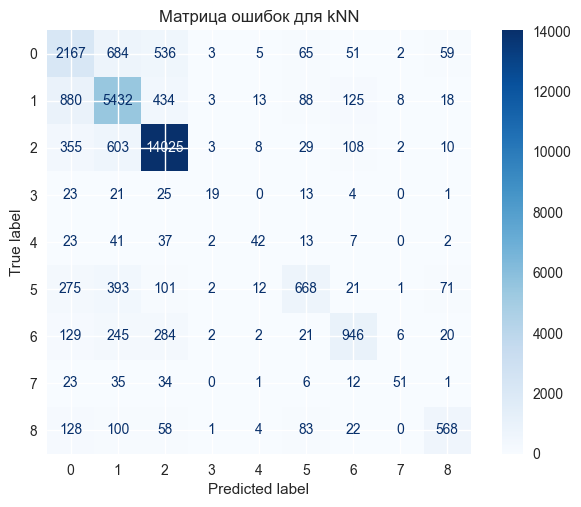

              precision    recall  f1-score   support

         1.0       0.54      0.61      0.57      3572
         2.0       0.72      0.78      0.75      7001
         3.0       0.90      0.93      0.91     15143
         4.0       0.54      0.18      0.27       106
         5.0       0.48      0.25      0.33       167
         6.0       0.68      0.43      0.53      1544
         7.0       0.73      0.57      0.64      1655
         8.0       0.73      0.31      0.44       163
         9.0       0.76      0.59      0.66       964

    accuracy                           0.79     30315
   macro avg       0.68      0.52      0.57     30315
weighted avg       0.79      0.79      0.78     30315



In [345]:
conf_mat_knn = confusion_matrix(y_test, y_pred_knn)

disp_knn = ConfusionMatrixDisplay(confusion_matrix=conf_mat_knn)
disp_knn.plot(cmap='Blues')
plt.title("Матрица ошибок для kNN")
plt.show()

print(classification_report(y_test, y_pred_knn))

In [347]:
model_knn = KNeighborsClassifier(n_neighbors=7, weights='distance', p=1)

model_knn.fit(X_train, y_train)

y_pred_knn = model_knn.predict(X_test)

train_accuracy_knn = model_knn.score(X_train, y_train)
train_error_knn = 1 - train_accuracy_knn

test_accuracy_knn = model_knn.score(X_test, y_test)
test_error_knn = 1 - test_accuracy_knn

print(f"Обучающая выборка — точность: {train_accuracy_knn:.4f} | ошибка: {train_error_knn:.4f}")
print(f"Тестовая выборка  — точность: {test_accuracy_knn:.4f} | ошибка: {test_error_knn:.4f}")

Обучающая выборка — точность: 0.9995 | ошибка: 0.0005
Тестовая выборка  — точность: 0.8053 | ошибка: 0.1947


Уже стало лучше.

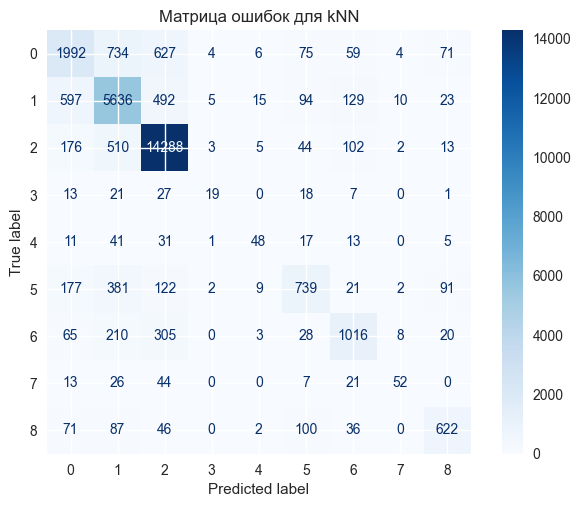

              precision    recall  f1-score   support

         1.0       0.64      0.56      0.60      3572
         2.0       0.74      0.81      0.77      7001
         3.0       0.89      0.94      0.92     15143
         4.0       0.56      0.18      0.27       106
         5.0       0.55      0.29      0.38       167
         6.0       0.66      0.48      0.55      1544
         7.0       0.72      0.61      0.66      1655
         8.0       0.67      0.32      0.43       163
         9.0       0.74      0.65      0.69       964

    accuracy                           0.81     30315
   macro avg       0.68      0.54      0.59     30315
weighted avg       0.80      0.81      0.80     30315



In [349]:
conf_mat_knn = confusion_matrix(y_test, y_pred_knn)

disp_knn = ConfusionMatrixDisplay(confusion_matrix=conf_mat_knn)
disp_knn.plot(cmap='Blues')
plt.title("Матрица ошибок для kNN")
plt.show()

print(classification_report(y_test, y_pred_knn))

Нормализуем данные для того, чтобы привести признаки к единому масштабу.

In [351]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_knn = KNeighborsClassifier(n_neighbors=7, weights='distance', p=1)

model_knn.fit(X_train_scaled, y_train)

y_pred_knn = model_knn.predict(X_test_scaled)

train_accuracy_knn = model_knn.score(X_train_scaled, y_train)
train_error_knn = 1 - train_accuracy_knn

test_accuracy_knn = model_knn.score(X_test_scaled, y_test)
test_error_knn = 1 - test_accuracy_knn

print(f"Обучающая выборка — точность: {train_accuracy_knn:.4f} | ошибка: {train_error_knn:.4f}")
print(f"Тестовая выборка  — точность: {test_accuracy_knn:.4f} | ошибка: {test_error_knn:.4f}")

Обучающая выборка — точность: 0.9995 | ошибка: 0.0005
Тестовая выборка  — точность: 0.8637 | ошибка: 0.1363


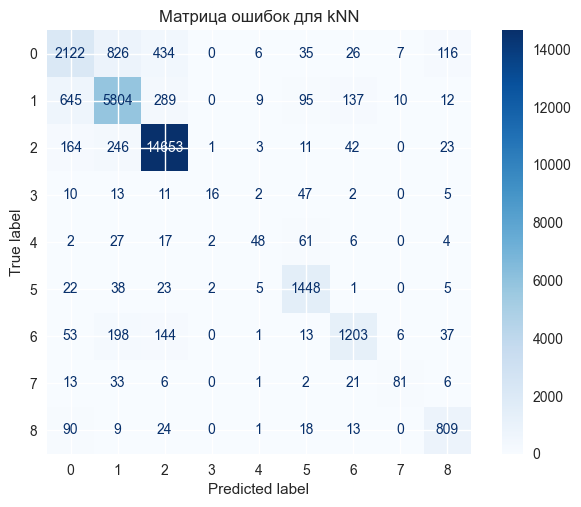

              precision    recall  f1-score   support

         1.0       0.68      0.59      0.63      3572
         2.0       0.81      0.83      0.82      7001
         3.0       0.94      0.97      0.95     15143
         4.0       0.76      0.15      0.25       106
         5.0       0.63      0.29      0.40       167
         6.0       0.84      0.94      0.88      1544
         7.0       0.83      0.73      0.77      1655
         8.0       0.78      0.50      0.61       163
         9.0       0.80      0.84      0.82       964

    accuracy                           0.86     30315
   macro avg       0.78      0.65      0.68     30315
weighted avg       0.86      0.86      0.86     30315



In [353]:
conf_mat_knn = confusion_matrix(y_test, y_pred_knn)

disp_knn = ConfusionMatrixDisplay(confusion_matrix=conf_mat_knn)
disp_knn.plot(cmap='Blues')
plt.title("Матрица ошибок для kNN")
plt.show()

print(classification_report(y_test, y_pred_knn))

2. Random Forest

In [354]:
model_rf = RandomForestClassifier(
    n_estimators=59,
    max_depth=12,
    random_state=52,
    n_jobs=-1
)

model_rf.fit(X_train, y_train)

y_pred_rf = model_rf.predict(X_test)

train_accuracy_rf = model_rf.score(X_train, y_train)
train_error_rf = 1 - train_accuracy_rf

test_accuracy_rf = model_rf.score(X_test, y_test)
test_error_rf = 1 - test_accuracy_rf

print(f"Обучающая выборка — точность: {train_accuracy_rf:.4f} | ошибка: {train_error_rf:.4f}")
print(f"Тестовая выборка  — точность: {test_accuracy_rf:.4f} | ошибка: {test_error_rf:.4f}")

Обучающая выборка — точность: 0.8992 | ошибка: 0.1008
Тестовая выборка  — точность: 0.8884 | ошибка: 0.1116


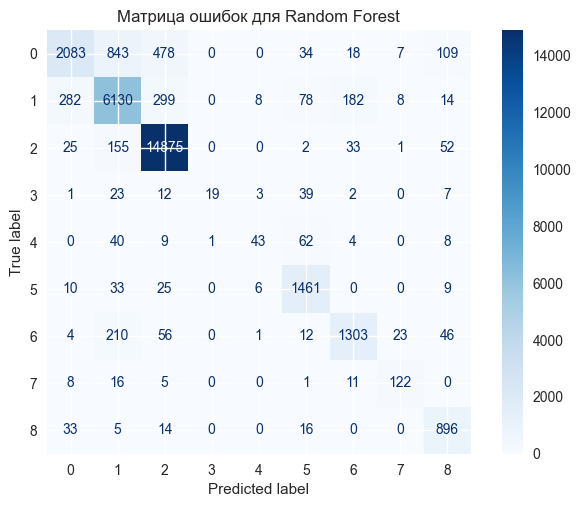

              precision    recall  f1-score   support

         1.0       0.85      0.58      0.69      3572
         2.0       0.82      0.88      0.85      7001
         3.0       0.94      0.98      0.96     15143
         4.0       0.95      0.18      0.30       106
         5.0       0.70      0.26      0.38       167
         6.0       0.86      0.95      0.90      1544
         7.0       0.84      0.79      0.81      1655
         8.0       0.76      0.75      0.75       163
         9.0       0.79      0.93      0.85       964

    accuracy                           0.89     30315
   macro avg       0.83      0.70      0.72     30315
weighted avg       0.89      0.89      0.88     30315



In [355]:
conf_mat_rf = confusion_matrix(y_test, y_pred_rf)

disp_rf = ConfusionMatrixDisplay(confusion_matrix=conf_mat_rf)
disp_rf.plot(cmap='Blues')
plt.title("Матрица ошибок для Random Forest")
plt.show()

print(classification_report(y_test, y_pred_rf))

3. Extra Trees

In [356]:
model_et = ExtraTreesClassifier(
    n_estimators=50,
    max_depth=12,
    random_state=52,
    n_jobs=-1
)

model_et.fit(X_train, y_train)

y_pred_et = model_et.predict(X_test)

train_accuracy_et = model_et.score(X_train, y_train)
train_error_et = 1 - train_accuracy_et

test_accuracy_et = model_et.score(X_test, y_test)
test_error_et = 1 - test_accuracy_et

print(f"Обучающая выборка — точность: {train_accuracy_et:.4f} | ошибка: {train_error_et:.4f}")
print(f"Тестовая выборка  — точность: {test_accuracy_et:.4f} | ошибка: {test_error_et:.4f}")

Обучающая выборка — точность: 0.8406 | ошибка: 0.1594
Тестовая выборка  — точность: 0.8352 | ошибка: 0.1648


In [357]:
model_et = ExtraTreesClassifier(
    n_estimators=300,
    max_depth=12,
    random_state=52,
    n_jobs=-1
)

model_et.fit(X_train, y_train)

y_pred_et = model_et.predict(X_test)

train_accuracy_et = model_et.score(X_train, y_train)
train_error_et = 1 - train_accuracy_et

test_accuracy_et = model_et.score(X_test, y_test)
test_error_et = 1 - test_accuracy_et

print(f"Обучающая выборка — точность: {train_accuracy_et:.4f} | ошибка: {train_error_et:.4f}")
print(f"Тестовая выборка  — точность: {test_accuracy_et:.4f} | ошибка: {test_error_et:.4f}")

Обучающая выборка — точность: 0.8446 | ошибка: 0.1554
Тестовая выборка  — точность: 0.8386 | ошибка: 0.1614


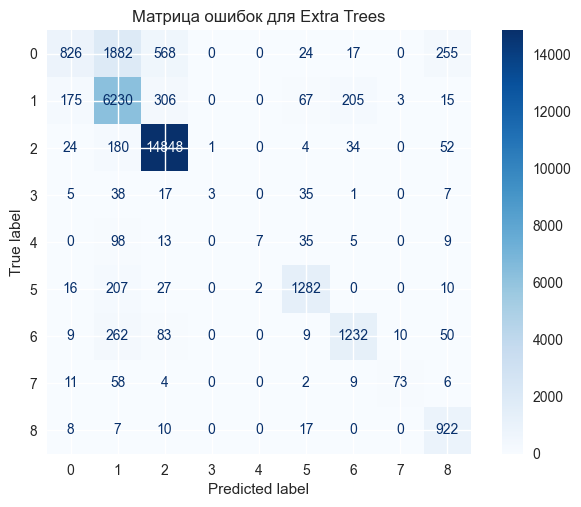

              precision    recall  f1-score   support

         1.0       0.77      0.23      0.36      3572
         2.0       0.70      0.89      0.78      7001
         3.0       0.94      0.98      0.96     15143
         4.0       0.75      0.03      0.05       106
         5.0       0.78      0.04      0.08       167
         6.0       0.87      0.83      0.85      1544
         7.0       0.82      0.74      0.78      1655
         8.0       0.85      0.45      0.59       163
         9.0       0.70      0.96      0.81       964

    accuracy                           0.84     30315
   macro avg       0.80      0.57      0.58     30315
weighted avg       0.84      0.84      0.82     30315



In [358]:
conf_mat_et = confusion_matrix(y_test, y_pred_et)

disp_et = ConfusionMatrixDisplay(confusion_matrix=conf_mat_et)
disp_et.plot(cmap='Blues')
plt.title("Матрица ошибок для Extra Trees")
plt.show()

print(classification_report(y_test, y_pred_et))

4. LinearSVC

In [359]:
from sklearn.svm import LinearSVC

model_svc = LinearSVC(
    C=10.0,
    class_weight='balanced',
    random_state=52,
    max_iter=2000)

model_svc.fit(X_train_scaled, y_train)

y_pred_svc = model_svc.predict(X_test_scaled)

train_accuracy_svc = model_svc.score(X_train_scaled, y_train)
train_error_svc = 1 - train_accuracy_svc

test_accuracy_svc = model_svc.score(X_test_scaled, y_test)
test_error_svc = 1 - test_accuracy_svc

print(f"Обучающая выборка — точность: {train_accuracy_svc:.4f}| ошибка: {train_error_svc:.4f}")
print(f"Тестовая выборка  — точность: {test_accuracy_svc:.4f} | ошибка: {train_error_svc:.4f}")

Обучающая выборка — точность: 0.7255| ошибка: 0.2745
Тестовая выборка  — точность: 0.7247 | ошибка: 0.2745


In [360]:
results = pd.DataFrame({
    'Модель': [
        'KNeighborsClassifier',
        'RandomForestClassifier',
        'ExtraTreesClassifier',
        'LinearSVC'
    ],
    'Точность (accuracy)': [
        test_accuracy_knn,
        test_accuracy_rf,
        test_accuracy_et,
        test_accuracy_svc
    ]
})

results['Точность (%)'] = (results['Точность (accuracy)'] * 100).round(2).astype(str) + '%'

results = results.sort_values('Точность (accuracy)', ascending=False).reset_index(drop=True)

print(results[['Модель', 'Точность (%)']].to_string(index=False))

                Модель Точность (%)
RandomForestClassifier       88.84%
  KNeighborsClassifier       86.37%
  ExtraTreesClassifier       83.86%
             LinearSVC       72.47%


In [361]:
X

,iyear,imonth,iday,country,region,latitude,longitude,targtype1,targsubtype1,natlty1,weaptype1,weapsubtype1,extended,multiple,success,suicide,ishostkid,nkill
0,1970,7,2,58,2,18.456792,-69.951164,14.0,68.0,58.0,13.0,-1.0,0,0.0,1.0,0.0,0.0,1.0
1,1970,0,0,130,1,19.371887,-99.086624,7.0,45.0,21.0,13.0,-1.0,0,0.0,1.0,0.0,1.0,0.0
2,1970,1,0,160,5,15.478598,120.599741,10.0,54.0,217.0,13.0,-1.0,0,0.0,1.0,0.0,0.0,1.0
3,1970,1,0,78,8,37.997490,23.762728,7.0,46.0,217.0,6.0,16.0,0,0.0,1.0,0.0,0.0,0.0
4,1970,1,0,101,4,33.580412,130.396361,7.0,46.0,217.0,8.0,-1.0,0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181681,2017,12,31,98,8,42.888982,13.772795,14.0,65.0,98.0,-1.0,-1.0,0,0.0,1.0,0.0,0.0,0.0
181684,2017,12,31,4,6,35.921051,64.774544,1.0,7.0,4.0,6.0,16.0,0,0.0,1.0,0.0,0.0,0.0
181685,2017,12,31,182,11,2.359673,45.385034,4.0,36.0,182.0,5.0,5.0,0,0.0,1.0,0.0,0.0,1.0
181688,2017,12,31,92,6,24.798346,93.940430,2.0,21.0,92.0,6.0,7.0,0,0.0,0.0,0.0,0.0,0.0


In [362]:
features_to_use_modif = [
    'iyear', 'imonth', 'iday',
    'country', 'region',
    'latitude', 'longitude',
    'targtype1', 'targsubtype1', 'natlty1',
    'weaptype1', 'weapsubtype1',
    'extended', 'multiple', 'success',
    'suicide', 'ishostkid', 'nkill']
df_mi = X[features_to_use_modif].copy()

X_mi = df_mi
y_mi = y.astype(int)

mi_scores = mutual_info_classif(X_mi, y_mi, random_state=42)

mi_df = pd.DataFrame({
    'feature': features_to_use_modif,
    'mutual_info': mi_scores
}).sort_values('mutual_info', ascending=False)

print(mi_df)

         feature  mutual_info
10     weaptype1     0.765256
11  weapsubtype1     0.720773
8   targsubtype1     0.257696
6      longitude     0.216102
5       latitude     0.206832
16     ishostkid     0.169315
3        country     0.130553
9        natlty1     0.119753
7      targtype1     0.119101
17         nkill     0.107817
12      extended     0.089457
4         region     0.056766
0          iyear     0.050646
14       success     0.024813
15       suicide     0.018431
13      multiple     0.015200
1         imonth     0.004462
2           iday     0.001976


Исходя из представленных данных, можно определить зависимость каждого из приведенных признаков от типа атаки. Значение, близкое к нулю, говорит о том, что связь практически отсутствует, к таким признакам относятся extended, region, iyear, success, suicide, multiple, imonth, iday. Средняя связь с targsubtype1, longitude, latitude, ishostkid, country, natlty1, targtype1, nkill. Самая сильная зависимость с weaptype1 и weapsubtype1. Попробуем отбросить признаки, с которыми связь низкая.

In [363]:
new_features_to_use = ['weaptype1', 'weapsubtype1', 'targsubtype1', 'longitude', 'latitude', 'ishostkid', 'country', 'natlty1', 'targtype1', 'nkill']

In [364]:
X_new = X[new_features_to_use].copy()

In [365]:
y_new = y

In [366]:
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size = 0.2, stratify = y_new, random_state = 42)

In [367]:
model_rf = RandomForestClassifier(
    n_estimators=30,
    max_depth=12,
    random_state=52,
    n_jobs=-1
)

model_rf.fit(X_train_new, y_train_new)

y_pred_rf = model_rf.predict(X_test_new)

train_accuracy_rf_new = model_rf.score(X_train_new, y_train_new)
train_error = 1 - train_accuracy_rf_new

test_accuracy_rf_new = model_rf.score(X_test_new, y_test_new)
test_error = 1 - test_accuracy_rf_new

print(f"Обучающая выборка — точность: {train_accuracy_rf_new:.4f} | ошибка: {train_error:.4f}")
print(f"Тестовая выборка  — точность: {test_accuracy_rf_new:.4f} | ошибка: {test_error:.4f}")

Обучающая выборка — точность: 0.8828 | ошибка: 0.1172
Тестовая выборка  — точность: 0.8704 | ошибка: 0.1296


Это не особо сильно повлияло на результат.

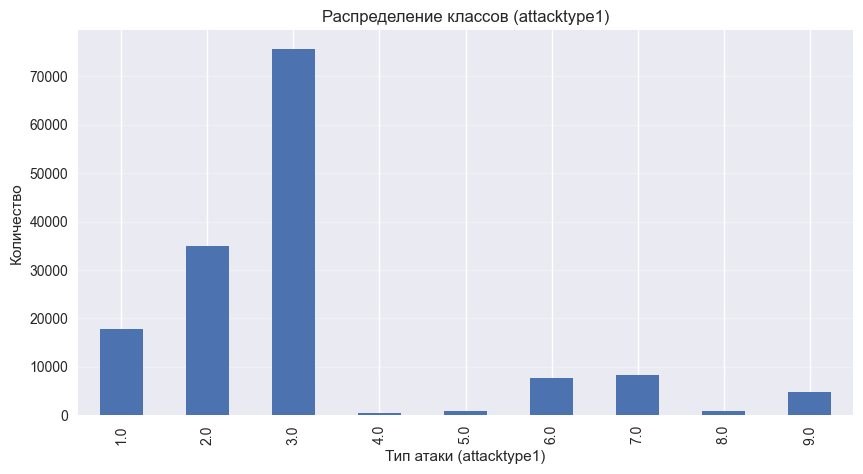

In [368]:
y.value_counts().sort_index().plot(kind='bar', figsize=(10, 5))
plt.title('Распределение классов (attacktype1)')
plt.xlabel('Тип атаки (attacktype1)')
plt.ylabel('Количество')
plt.grid(axis='y', alpha=0.3)
plt.show()

Самыми редкими являются классы 4, 5, 8. Самыми частыми являются классы 1, 2 и 3.

In [369]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

model_rf = RandomForestClassifier(
    n_estimators=57,
    max_depth=12,
    random_state=52,
    n_jobs=-1,
    class_weight='balanced'
)

model_rf.fit(X_train_bal, y_train_bal)

y_pred_rf = model_rf.predict(X_test)

train_accuracy_rf = model_rf.score(X_train_bal, y_train_bal)
train_error = 1 - train_accuracy_rf

test_accuracy_rf = model_rf.score(X_test, y_test)
test_error = 1 - test_accuracy_rf

print(f"Обучающая выборка — точность: {train_accuracy_rf:.4f} | ошибка: {train_error:.4f}")
print(f"Тестовая выборка  — точность: {test_accuracy_rf:.4f} | ошибка: {test_error:.4f}")

Обучающая выборка — точность: 0.9028 | ошибка: 0.0972
Тестовая выборка  — точность: 0.8679 | ошибка: 0.1321


Общие выводы

В ходе этой работы я научилась работать с датасетом, читать данные, обрабатывать, визуализировать их, бороться с несбалансированностью классов, обрабатывать пропущенные значения, обучать модель и анализировать результаты. В результате, получилось создать модель, которая достаточно хорошо предсказывает тип атаки на основании различных признаков. В результате разработана модель машинного обучения, которая демонстрирует высокое качество классификации типов атак (accuracy — 0.89, weighted F1-score — 0.88, macro F1-score — 0.72).